<a href="https://colab.research.google.com/github/aneeshmurali-n/Project-ML-Data-Preprocessing/blob/main/Project_ML_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Dataset.

In [1]:
import google.colab.files as files
uploaded_file = files.upload()

Saving Employee.csv to Employee.csv


In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

##Data Exploration:
Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.

In [3]:
# Explore the data
df = pd.read_csv('Employee.csv') # load csv
df # show df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
df.info() # show df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
# list down the unique values in each feature and find its length.
def unique_values(df):
    for column in df.columns:
        print(f"Unique Values in feature '{column}' :\n {df[column].unique()}\n Length : {df[column].nunique()}\n\n")

unique_values(df)

Unique Values in feature 'Company' :
 ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
 Length : 6


Unique Values in feature 'Age' :
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
 Length : 29


Unique Values in feature 'Salary' :
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
 Length : 40


Unique Values in feature 'Place' :
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
 Length : 11


Unique Values in feature 'Country' :
 ['India']
 Length : 1


Unique Values in feature 'Gender' :
 [0 1]
 Length : 2




In [6]:
# Perform the statistical analysis and renaming of the columns.
df.rename(columns={'Age': 'Employee Age', 'Salary': 'Employee Salary', }, inplace=True)
df['Company'] = df['Company'].replace('Infosys Pvt Lmt', 'Infosys') # rename company
df['Company'] = df['Company'].replace('Tata Consultancy Services','TCS')  # rename company
df['Company'] = df['Company'].replace('Congnizant','CTS')  # rename company
df.describe()

,Employee Age,Employee Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [7]:
unique_values(df); # show unique values in df after name correction

Unique Values in feature 'Company' :
 ['TCS' 'Infosys' 'CTS' nan]
 Length : 3


Unique Values in feature 'Employee Age' :
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
 Length : 29


Unique Values in feature 'Employee Salary' :
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
 Length : 40


Unique Values in feature 'Place' :
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
 Length : 11


Unique Values in feature 'Country' :
 ['India']
 Length : 1


Unique Values in feature 'Gender' :
 [0 1]
 Length : 2




In [8]:
df # show df after name correction

,Company,Employee Age,Employee Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


##Data Cleaning:
Find the missing and inappropriate values, treat them appropriately.<br>
Remove all duplicate rows.<br>
Find the outliers.<br>
Replace the value 0 in age as NaN<br>
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [9]:
# Find missing values
missing_values = df.isnull().sum()
print(f'Missing Values:\n{missing_values}')

Missing Values:
Company             8
Employee Age       18
Employee Salary    24
Place              14
Country             0
Gender              0
dtype: int64


In [10]:
# Treat missing appropriately.
# Fill missing 'Company' with 'Unknown'
df['Company'].fillna('Unknown', inplace=True)

# Fill missing 'Place' with 'Unknown'
df['Place'].fillna('Unknown', inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Replace the value 0 in age as NaN
df['Employee Age'].replace(0, np.nan, inplace=True)

# Fill missing 'Employee Age' using median
df['Employee Age'].fillna(df['Employee Age'].median(), inplace=True)

# Fill missing 'Employee Salary' using median
df['Employee Salary'].fillna(df['Employee Salary'].median(), inplace=True)

# Filter df take all rows that do not contains 'Unknown'
df = df[~(df == 'Unknown').any(axis=1)]

# Reset index
df = df.reset_index(drop=True)
df

,Company,Employee Age,Employee Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
118,Infosys,22.0,8202.0,Mumbai,India,0
119,TCS,33.0,9024.0,Calcutta,India,1
120,Infosys,44.0,4034.0,Delhi,India,1
121,TCS,33.0,5034.0,Mumbai,India,1


In [11]:
df.info() # show df info after clean up
unique_values(df) # show unique values in df after clean up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          123 non-null    object 
 1   Employee Age     123 non-null    float64
 2   Employee Salary  123 non-null    float64
 3   Place            123 non-null    object 
 4   Country          123 non-null    object 
 5   Gender           123 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 5.9+ KB
Unique Values in feature 'Company' :
 ['TCS' 'Infosys' 'CTS']
 Length : 3


Unique Values in feature 'Employee Age' :
 [20. 30. 35. 40. 23. 33. 34. 45. 18. 22. 32. 37. 50. 21. 46. 41. 24. 43.
 19. 38. 51. 31. 44. 26. 17. 36. 54.]
 Length : 27


Unique Values in feature 'Employee Salary' :
 [5000. 2300. 3000. 4000. 6000. 7000. 8000. 9000. 1089. 1234. 3030. 3045.
 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934. 4034.
 4345. 6544. 5034. 8202. 9024

outliers in Employee Age : Empty DataFrame
Columns: [Company, Employee Age, Employee Salary, Place, Country, Gender]
Index: []


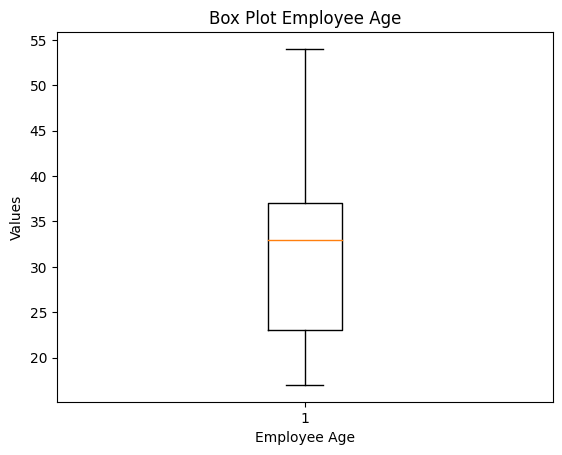

outliers in Employee Salary : Empty DataFrame
Columns: [Company, Employee Age, Employee Salary, Place, Country, Gender]
Index: []


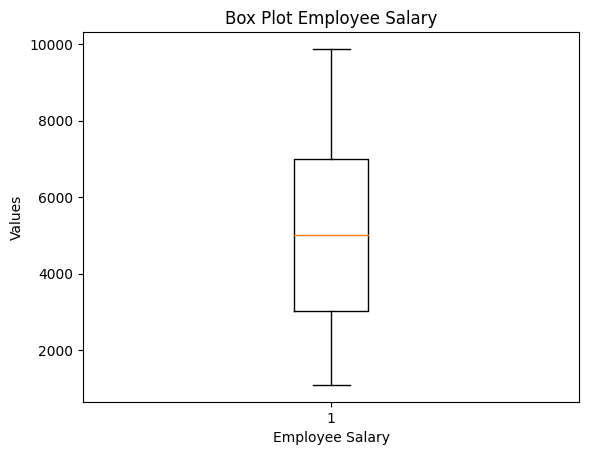

In [12]:
def find_outliers(df,column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Find outliers and return result
    return df[(df[column_name] < Q1 - 1.5 * IQR) | (df[column_name] > Q3 + 1.5 * IQR)]



# Find the outliers and print if any and Visualize outliers using a box plot
column_list = ['Employee Age','Employee Salary']
for column_name in column_list :
    print(f'outliers in {column_name} : {find_outliers(df,column_name)}')
    # Visualize outliers using a box plot
    plt.boxplot(df[column_name])
    plt.xlabel(column_name)
    plt.ylabel('Values')
    plt.title(f'Box Plot {column_name}')
    plt.show()

## Data Analysis:
Filter the data with age >40 and salary<5000<br>
Plot the chart with age and salary<br>
Count the number of people from each place and represent it visually

In [13]:
# Filter the data with age >40 and salary<5000
mask = (df['Employee Age'] > 40 ) & (df['Employee Salary'] < 5000) # create boolean mask
filter_df = df[mask] # take the masked values from the data frame df
filter_df # show filter_df

,Company,Employee Age,Employee Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
35,Infosys,41.0,3000.0,Mumbai,India,0
43,Infosys,41.0,3000.0,Chennai,India,0
49,Infosys,51.0,3184.0,Hyderabad,India,0
56,Infosys,43.0,4034.0,Mumbai,India,0
63,Infosys,44.0,3000.0,Cochin,India,0
73,Infosys,41.0,3000.0,Delhi,India,0
80,Infosys,54.0,3184.0,Mumbai,India,0
91,Infosys,44.0,4034.0,Delhi,India,0


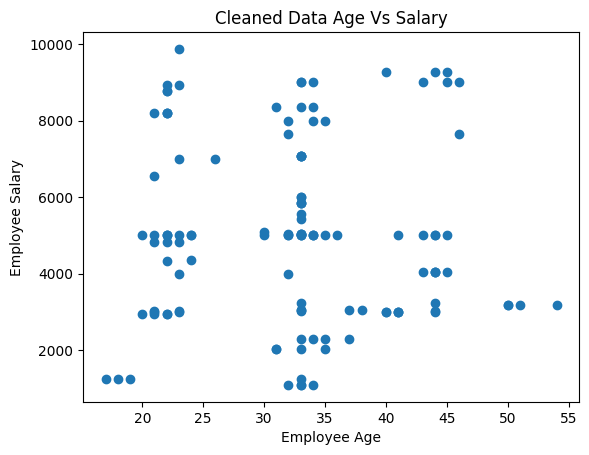

In [14]:
# Plot the chart with age and salary
plt.scatter(df['Employee Age'], df['Employee Salary'])
plt.xlabel('Employee Age')
plt.ylabel('Employee Salary')
plt.title('Cleaned Data Age Vs Salary')
plt.show()

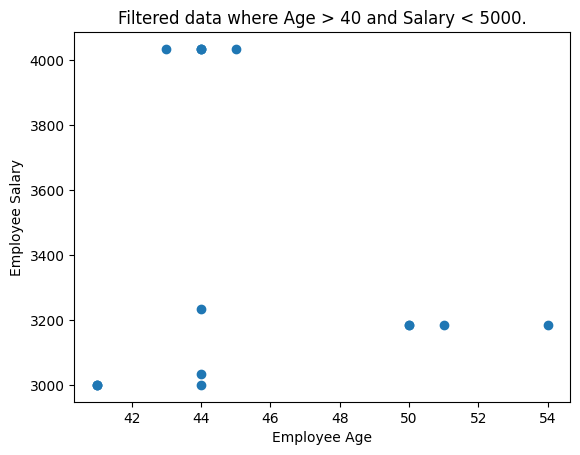

In [15]:
plt.scatter(filter_df['Employee Age'], filter_df['Employee Salary'])
plt.xlabel('Employee Age')
plt.ylabel('Employee Salary')
plt.title('Filtered data where Age > 40 and Salary < 5000.')
plt.show()

Number of people from each place:
Place
Mumbai        33
Calcutta      30
Chennai       13
Delhi         13
Cochin        13
Noida          7
Hyderabad      7
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


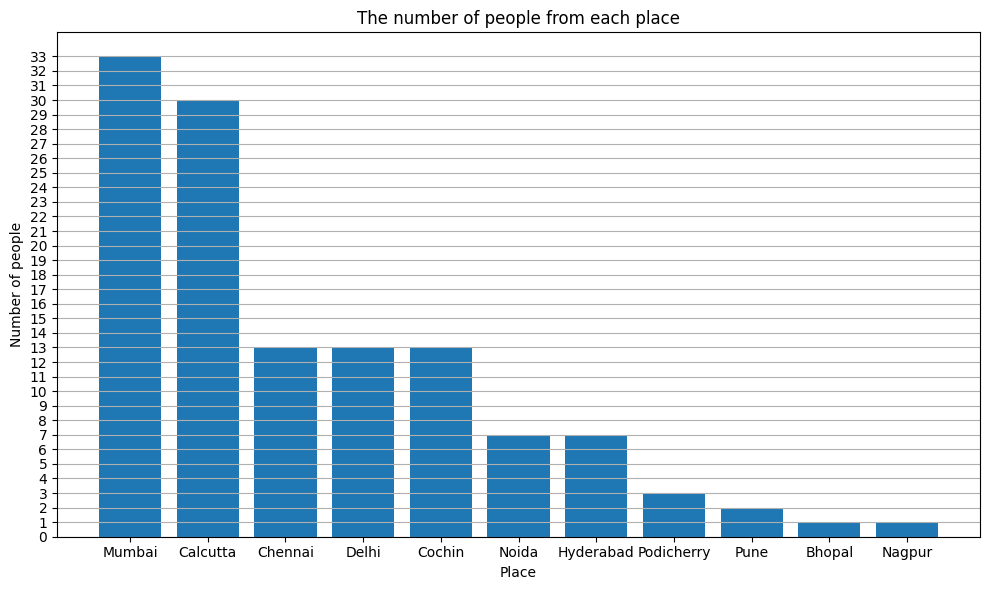

In [16]:
# Count the number of people from each place and represent it visually

count = df['Place'].value_counts() # Count the number of people from each place
print(f'Number of people from each place:\n{count}')
place = count.index
employees = count.values

#draw bar chart
plt.figure(figsize=[10,6])
plt.bar(place,employees)
plt.yticks(range(max(employees)+1))
plt.grid(axis='y')
plt.xlabel('Place')
plt.ylabel('Number of people')
plt.title('The number of people from each place')
plt.tight_layout()
plt.show()

Number of people from each place where Age > 40 and Salary < 5000:
Place
Mumbai        33
Calcutta      30
Chennai       13
Delhi         13
Cochin        13
Noida          7
Hyderabad      7
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


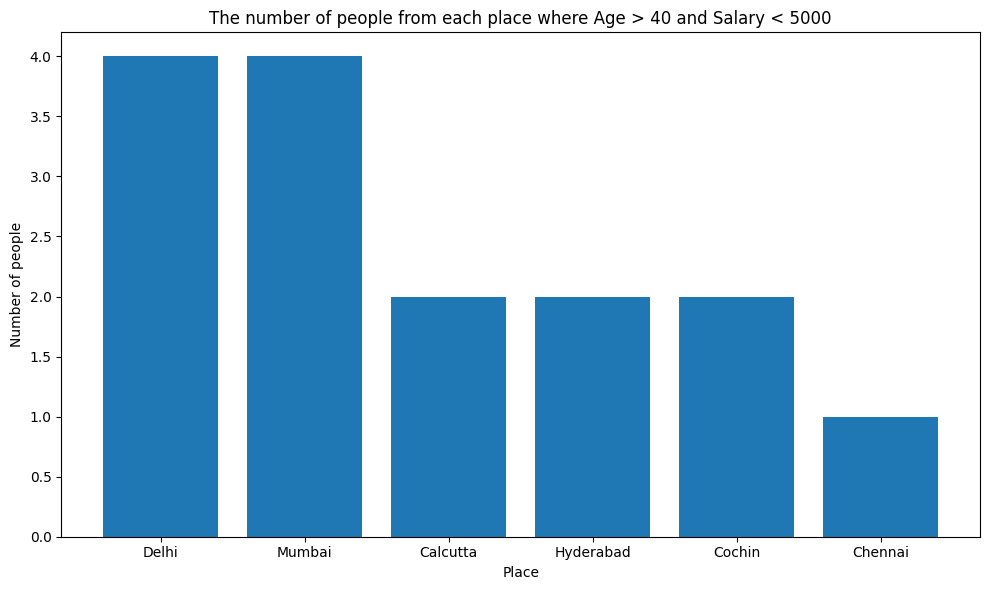

In [17]:
# Count the number of people from each place and represent it visually where Age > 40 and Salary < 5000
fcount = filter_df['Place'].value_counts() # Count the number of people from each place
print(f'Number of people from each place where Age > 40 and Salary < 5000:\n{count}')
fplace = fcount.index
femployees = fcount.values

#draw bar chart
plt.figure(figsize=[10,6])
plt.bar(fplace,femployees)
plt.xlabel('Place')
plt.ylabel('Number of people')
plt.title('The number of people from each place where Age > 40 and Salary < 5000')
plt.tight_layout()
plt.show()

##Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [18]:
#one-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_columns = one_hot_encoder.fit_transform(df[['Company', 'Place']])
encoded_features = one_hot_encoder.get_feature_names_out(['Company', 'Place'])
one_hot_encoded_df = pd.DataFrame(encoded_columns, columns=encoded_features)
one_hot_encoded_df

,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
119,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
# Here we are not considering the country because everything is from India
joined_df = pd.concat([df[['Employee Age','Employee Salary','Gender']], one_hot_encoded_df], axis=1)
joined_df

,Employee Age,Employee Salary,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5000.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,5000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,35.0,2300.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,3000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,4000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,22.0,8202.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
119,33.0,9024.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,44.0,4034.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
121,33.0,5034.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
#Label encoding
label_encoder = LabelEncoder()
label_encoded_df = df.copy() # make a copy or original df
colums_to_encode = ['Company','Place','Country']
for column in colums_to_encode:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])
label_encoded_df

,Company,Employee Age,Employee Salary,Place,Country,Gender
0,2,20.0,5000.0,2,0,0
1,1,30.0,5000.0,6,0,0
2,2,35.0,2300.0,1,0,0
3,1,40.0,3000.0,4,0,0
4,2,23.0,4000.0,6,0,0
...,...,...,...,...,...,...
118,1,22.0,8202.0,6,0,0
119,2,33.0,9024.0,1,0,1
120,1,44.0,4034.0,4,0,1
121,2,33.0,5034.0,6,0,1


##Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [21]:
# perform the scaling of the features using standard scaler (StandardScaler applied to label encoded  df 'label_encoded_df')
sd_scaler = StandardScaler()
label_encoded_df[['Employee Age', 'Employee Salary']] = sd_scaler.fit_transform(label_encoded_df[['Employee Age', 'Employee Salary']])
label_encoded_df

,Company,Employee Age,Employee Salary,Place,Country,Gender
0,2,-1.467635,-0.004180,2,0,0
1,1,-0.287000,-0.004180,6,0,0
2,2,0.303318,-1.158958,1,0,0
3,1,0.893635,-0.859571,4,0,0
4,2,-1.113445,-0.431875,6,0,0
...,...,...,...,...,...,...
118,1,-1.231508,1.365302,6,0,0
119,2,0.067191,1.716868,1,0,1
120,1,1.365890,-0.417334,4,0,1
121,2,0.067191,0.010362,6,0,1


In [22]:
# perform the scaling of the features using min max scaler. (MinMaxScaler applied to one-hot encoded  df 'joined_df')
min_max_scaler = MinMaxScaler()
joined_df[['Employee Age', 'Employee Salary']] = min_max_scaler.fit_transform(joined_df[['Employee Age', 'Employee Salary']])
joined_df

,Employee Age,Employee Salary,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,0.081081,0.445089,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.351351,0.445089,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.486486,0.137817,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.621622,0.217480,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.162162,0.331285,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.135135,0.809491,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
119,0.432432,0.903039,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,0.729730,0.335154,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.432432,0.448959,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
